In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

In [ ]:
to_gray = lambda img:np.sum(img.copy() * [.299,.587,.114], axis=-1)

In [ ]:
img = Image.open('eri.jpeg')
img_g = to_gray(np.array(img))

plt.imshow(img_g,cmap="gray", vmin=0, vmax=255)
plt.show()

In [ ]:
step = img_g.copy()
graph = np.arange(255)

threshold = 100

step[step > threshold] = 255
step[step <= threshold] = 0

graph[graph > threshold] = 255
graph[graph <= threshold] = 0

plt.imshow(step,cmap="gray", vmin=0, vmax=255)
plt.show()
plt.plot(graph)
plt.show()

In [ ]:
ab1 = img_g.copy()
graph = np.arange(255)


A,B, C= (50,70,255)

ab1[((ab1 > A) & (ab1 < B))] = C
graph[(graph > A) & (graph < B)] = C

plt.imshow(ab1,cmap="gray", vmin=0, vmax=255)
plt.show()
plt.plot(graph)
plt.show()

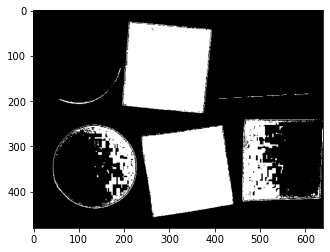

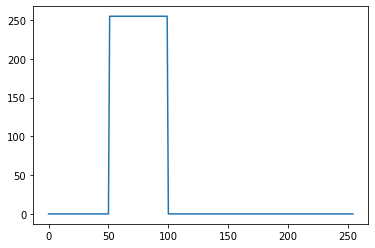

In [18]:
ab2 = img_g.copy()
graph = np.arange(255)

A,B,C = (50,100,255)

ab2[((ab2 >= B) |(ab2 <= A) )] = 0
ab2[(ab2 > A) & (ab2 < B)] = C

graph[((graph >= B) |(graph <= A) )] = 0
graph[(graph > A) & (graph < B)] = C

plt.imshow(ab2,cmap="gray", vmin=0, vmax=255)
plt.show()
plt.plot(graph)
plt.show()

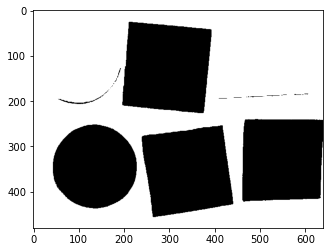

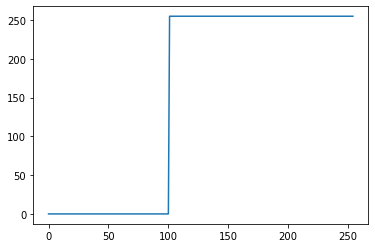

In [9]:
contrast = img_g.copy()
graph = np.arange(255).astype(float)

r1,r2 = (100,101)
s1,s2 = (0,255)

m1 = s1/r1
m2 = (s2-s1)/(r2-r1)
m3 = (255-s2)/(255-r1)

# Filter image
mask1 = (contrast <= r1)
mask2 = (contrast > r1) & (contrast < r2)
mask3 = (contrast >= r2)

contrast[mask1] *= m1
contrast[mask2] = (contrast[mask2]-r1)*m2+s1
contrast[mask3] = (contrast[mask3]-r2)*m3+s2

# Filter graph
mask1 = (graph <= r1)
mask2 = (graph > r1) & (graph < r2)
mask3 = (graph >= r2)

graph[mask1] *= m1
graph[mask2] = (graph[mask2]-r1)*m2+s1
graph[mask3] = (graph[mask3]-r2)*m3+s2

plt.imshow(contrast,cmap="gray", vmin=0, vmax=255)
plt.show()
plt.plot(graph)
plt.show()
        